In [2]:
''' Step 1: Importing Libraries
You started by importing essential libraries required for data manipulation, visualization, and machine learning. '''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
''' Step 2: Downloading and Loading Data
You downloaded the Titanic dataset from a URL using the requests library and loaded it into a pandas DataFrame. '''
import requests

# URL to the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

# Download the file from the URL
response = requests.get(url)

# Save the content to a local file
with open('titanic.csv', 'wb') as file:
    file.write(response.content)

# Load the dataset from the saved file
df = pd.read_csv('titanic.csv')

# Check the first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
'''
Step 3: Initial Data Exploration
You explored the dataset by displaying the first few rows, checking basic information, and summarizing numerical columns.
'''
# Display the first few rows of the dataset
df.head()

# Display basic information about the dataset
df.info()

# Display summary statistics for numerical columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
'''
Step 4: Handling Missing Values
You handled missing values by filling them for certain columns and dropping others.
'''
# Check for missing values
df.isnull().sum()

# Handle missing values in 'Age' by filling with the median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing 'Embarked' values with the most common embarkation port
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop the 'Cabin' column due to a high number of missing values
df = df.drop('Cabin', axis=1)

# Drop any remaining rows with missing values
df = df.dropna()


In [12]:
'''
Step 5: Encoding Categorical Variables
You converted categorical columns into numerical format using one-hot encoding.
'''
# Convert categorical variables to dummy/indicator variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


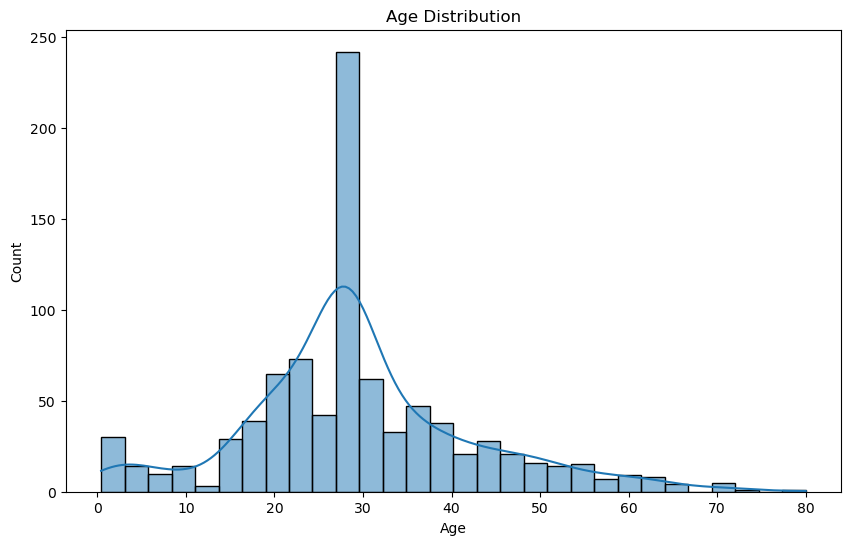

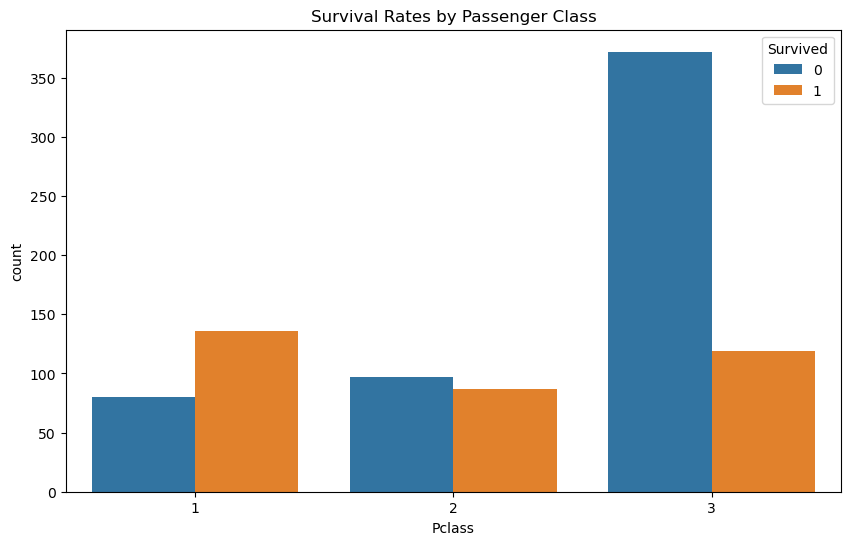

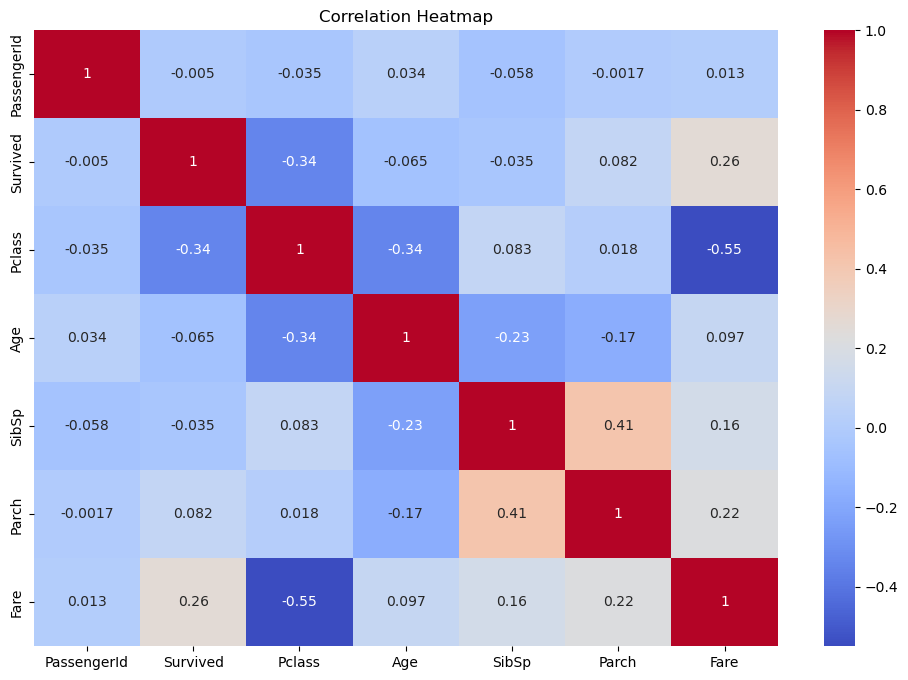

In [18]:
'''
Step 6: Data Visualization
You visualized the data to explore distributions and relationships between variables.
'''
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Plot survival rates by 'Pclass'
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Rates by Passenger Class')
plt.show()

# Select only the numerical columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [20]:
'''
Step 7: Feature Engineering
You created new features, 'FamilySize' and 'IsAlone', to potentially enhance the model's predictive power.
'''
# Create a 'FamilySize' feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create a 'IsAlone' feature
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Drop features that won't be used
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)


In [22]:
'''
Step 8: Preparing Data for Modeling
You ensured the data was numerical and split it into features (X) and target (y) for machine learning.
'''
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np  # Import NumPy directly

# Ensure all data is numerical by selecting numeric columns only
numeric_df = df.select_dtypes(include=[np.number])

# Separate the features (X) and the target (y)
X = numeric_df.drop('Survived', axis=1)
y = numeric_df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
'''
Step 9: Modeling with Random Forest
You implemented a Random Forest classifier, trained it, and evaluated its performance using a confusion matrix and classification report.
'''
# Initialize a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[85 20]
 [31 43]]
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       105
           1       0.68      0.58      0.63        74

    accuracy                           0.72       179
   macro avg       0.71      0.70      0.70       179
weighted avg       0.71      0.72      0.71       179

